<a href="https://colab.research.google.com/github/akhundMurad/MachineLearning/blob/main/practice/IMDBClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB reviews classifier. Binary classification.

## 1. Preparation.

#### 1.1 Prepare dataset.

In [26]:
from tensorflow.keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()  # Word to index
reverse_word_index = {index: word for index, word in word_index.items()}  # Index to word

#### 1.2 Convert input sequences into binary matrix.

In [2]:
import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros(shape=(len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 2. Model definition and training.

#### 2.1 Define model its architecture.

In [9]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

#### 2.2 Compile the model.

In [11]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

## 3. Test the solution.

#### 3.1 Model training.

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 5s 75ms/step - loss: 0.5347 - accuracy: 0.7836 - val_loss: 0.4151 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3429 - accuracy: 0.8901 - val_loss: 0.3505 - val_accuracy: 0.8648
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2580 - accuracy: 0.9151 - val_loss: 0.3343 - val_accuracy: 0.8586
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2127 - accuracy: 0.9285 - val_loss: 0.2801 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 3s 96ms/step - loss: 0.1780 - accuracy: 0.9405 - val_loss: 0.2830 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1518 - accuracy: 0.9503 - val_loss: 0.2868 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1316 - accuracy: 0.9575 - val_loss: 0.3011 - val_accuracy: 0.8844
Epoch 8/20
30

#### 3.2 Loss on the train and validation steps.

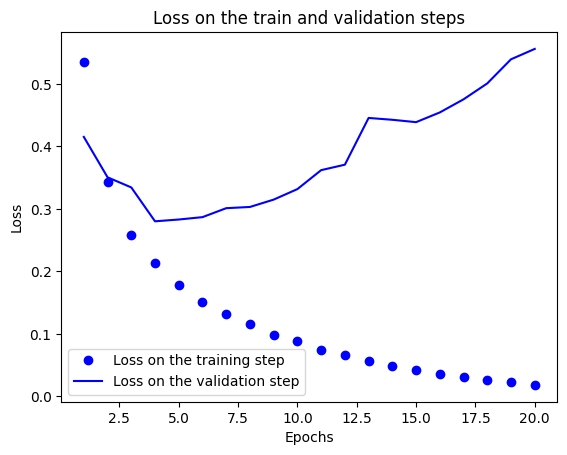

In [15]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict["loss"]
validation_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Loss on the training step")
plt.plot(epochs, validation_loss_values, "b", label="Loss on the validation step")
plt.title("Loss on the train and validation steps")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### 3.3 Train the model from scratch.

In [17]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(
   optimizer="rmsprop",
   loss="binary_crossentropy",
   metrics=["accuracy"],
)

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.4842 - accuracy: 0.8005
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2865 - accuracy: 0.8979
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2224 - accuracy: 0.9196
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2932 - accuracy: 0.8822


[0.2932341396808624, 0.8821600079536438]

#### 3.4 Use trained network to predict on the new data.

In [30]:
import random

filtered_words = list(
    filter(
        lambda word: word < 10000,
        word_index.values()
    )
)
review_1 = random.choices(filtered_words, k=100)
review_2 = random.choices(filtered_words, k=100)
reviews = vectorize_sequences([review_1, review_2])

model.predict(reviews)

1/1 [==============================] - 0s 217ms/step


array([[0.6869568],
       [0.4165167]], dtype=float32)